## **Título del proyecto:** Efecto del uso de pantallas en menores de edad

## **Por:** Juan Diego Rodríguez

**Contexto**

El tema del dataset escogido es sobre el tiempo y el efecto que tienen en menores de edad de entre 8-18 años de la India el uso de la pantallas por medio de cualquier dispositivo.

**Audiencia**

Este análisis está dirigido principalmente a los padres. Sin embargo, puede ser útil también para los que no somos padres y determinar si nosotros también deberíamos o no pasar mucho tiempo frente a una pantalla.

**Preguntas de interés**

1. ¿Cómo afecta a una persona el uso prolongado de las pantallas?
2. ¿Influye la edad en el tiempo que dedican los menores a usar un dispositivo?

**Hipótesis**

1. Se cree que el uso prolongado de las pantallas puede afectar el sueño.
2. A mayor edad, más tiempo dedican los menores a los dispositivos electrónicos.

**Variables del dataset**

1. **Age**: Edad del menor
2. **Gender**: Género del menor
3. **Daily_Screen_Time_hr**: Tiempo dedicado a estar frente a una pantalla
4. **Primary_Device**: Dispositivo usado (celular, computadora, tv, etc)
5. **Exceeded_Recommended_Limit**: Limite de tiempo recomendado por Indian Academy of Pediatrics (IAP)
6. **Health_Impacts**: El efecto o impacto que tiene el uso de pantallas en menores de edad
7. **Urban_or_Rural**: Indica si el menor vive en una zona urbana o rural


## 1️⃣Cargar y preparar los datos

**Importar librerías**

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string as str

**Cargar dataset desde Github**

In [136]:
df = pd.read_csv('https://raw.githubusercontent.com/JuanchoD02/Efecto-del-uso-de-pantallas-en-menores-de-edad/refs/heads/main/Indian_Kids_Screen_Time.csv')

# Mostrar vista previa del DataFrame de forma aleatoria
df.head()
df.sample(7)

,Age,Gender,Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Health_Impacts,Urban_or_Rural
1768,14,Female,4.17,Smartphone,True,Poor Sleep,Urban
8717,8,Male,9.28,Smartphone,True,"Poor Sleep, Eye Strain",Urban
3269,13,Male,5.27,Smartphone,True,Eye Strain,Rural
8451,15,Female,4.27,Smartphone,True,Anxiety,Urban
8604,13,Male,3.95,Smartphone,True,Poor Sleep,Urban
9105,8,Male,0.04,TV,False,NaN,Rural
1750,18,Male,5.15,TV,True,Anxiety,Urban


**Exploración inicial del dataset**

En esta parte exploraremos cómo está formado originalmente el dataset para conocerlo y entenderlo antes de trabajar con él.

In [137]:
# Mostrar el tipo de dato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         9486 non-null   int64  
 1   Gender                      9486 non-null   object 
 2   Daily_Screen_Time_hr        9486 non-null   float64
 3   Primary_Device              9486 non-null   object 
 4   Exceeded_Recommended_Limit  9486 non-null   bool   
 5   Health_Impacts              6494 non-null   object 
 6   Urban_or_Rural              9486 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 454.0+ KB


In [138]:
# Mostrar estadísticas básicas del dataset de variables númericas
df.describe()

,Age,Daily_Screen_Time_hr
count,9486.00000,9486.000000
mean,13.07063,4.456541
std,3.13967,1.600142
min,8.00000,0.010000
25%,10.00000,3.500000
50%,13.00000,4.480000
75%,16.00000,5.400000
max,18.00000,13.890000


In [139]:
# Mostrar estadísticas básicas del dataset de variables no númericas
df.describe(include=object)

,Gender,Primary_Device,Health_Impacts,Urban_or_Rural
count,9486,9486,6494,9486
unique,2,4,15,2
top,Male,Smartphone,Poor Sleep,Urban
freq,4835,4472,2268,6688


In [140]:
# Verificar si hay valores nulos
df.isnull().sum()

,0
Age,0
Gender,0
Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Health_Impacts,2992
Urban_or_Rural,0


In [141]:
# Mostrar medidas de tendencia central de variables numéricas
# Variable 'Age'
mean_age = df['Age'].mean().round(2)
median_age = df['Age'].median()
mode_age = df['Age'].mode().values[0]


print(f"Media: {mean_age}, Mediana: {median_age}, Moda: {mode_age}")
print("")

# Variable 'Daily_Screen_Time_hr'
mean_time = df['Daily_Screen_Time_hr'].mean().round(2)
median_time = df['Daily_Screen_Time_hr'].median()
mode_time = df['Daily_Screen_Time_hr'].mode().values[0]

print(f"Media: {mean_time}, Mediana: {median_time}, Moda: {mode_time}")

Media: 13.07, Mediana: 13.0, Moda: 17

Media: 4.46, Mediana: 4.48, Moda: 4.93


**Resumen metadata**

In [169]:
# Número total de casos
df.shape[0]

9486

In [186]:
# Número total de niños y niñas
boys = df[df['Gender'] == 'Male'].count().values[0]
girls = df[df['Gender'] == 'Female'].count().values[0]

print("Niños: ", boys)
print("Niñas: ", girls)

Niños:  4835
Niñas:  4651


In [189]:
# Número ttoal de casos en áreas rurales y urbanas
rural = df[df['Urban_or_Rural'] == 'Rural'].count().values[0]
urban = df[df['Urban_or_Rural'] == 'Urban'].count().values[0]

print("Casos en zonas rurales: ", rural)
print("Casos en zonas urbanas: ", urban)

Casos en zonas rurales:  2798
Casos en zonas urbanas:  6688


❗Nota importante: Después de haber corrido el bloque de código de arriba, vemos que no hay valores nulos. Pero en la columna *Health_Impacts* dice que hay 3218 valores nulos. En realidad, estos no son valores nulos, pues si nos fijamos en el dataset en Excel, vemos que no tenemos celdas vacías. Más bien, dichas celdas contienen el valor *None*. En este caso y en el contexto que estamos analizando, este valor significa que no hay un impacto en la salud del menor. Por lo tanto, no es necesario eliminar aquellas celdas que contienen el valor *None* de esta columna.

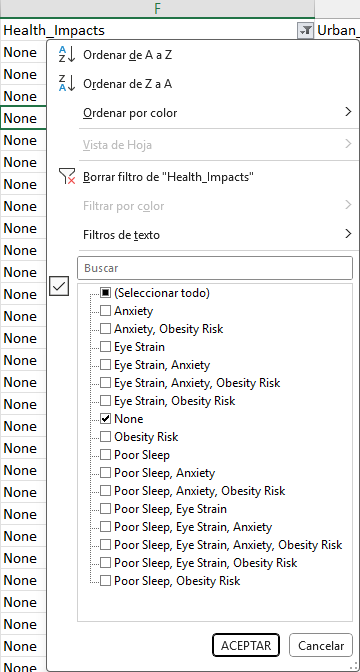

## 2️⃣ Análisis Exploratorio de Datos (EDA)

# **¿Cómo afecta a una persona el uso prolongado de las pantallas?**

❗Nota importante: Para poder realizar el gráfico *Efectos en la salud al estar mucho tiempo frente a una pantalla* tuve que hacer ciertas cosas con mi dataframe para lograr graficar impactos en la salud (*Health_Impacts*) y el tiempo dedicado a estar frente a una pantalla (*Daily_Screen_Time_hr*). El problema estuvo en que la columna *Health_Impacts* (tanto del dataframe original como la copia) tenía diferentes impactos en una sola celda, como: `Poor Sleep, Eye Strain, Anxiety`. Eso no era posible de graficar porque sería considerado como una lista diferente por cada celda. Así que para solucionarlo, en la copia del dataframe dejé solo el primer impacto que aparece en cada celda. También me aseguré de incluir los `None`, es decir, los casos en los que no hay impactos negativos en la salud. Luego fue necesario filtrar y obtener un promedio del tiempo que dedica cada menor a estar frente a un dispositivo.

In [190]:
# Crear una copia del dataframe original
df_copy = df.copy()

# Separar los impactos en la salud
df_copy['Health_Impacts'] = df_copy['Health_Impacts'].str.split(',')

# Asegurarme de incluir casos en los que no hayan efectos negativos en la salud
df_copy['Health_Impacts'] = df_copy['Health_Impacts'].fillna('None')

# Dejar solo un impacto en la salud por cada fila
df_copy = df_copy.explode('Health_Impacts')

# Eliminar espacios en blanco
df_copy['Health_Impacts'] = df_copy['Health_Impacts'].str.strip()

# Mostrar vista previa de la copia del dataframe actualizado
df_copy.head()
df_copy.sample(8)

,Age,Gender,Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Health_Impacts,Urban_or_Rural
8897,16,Female,7.36,TV,True,Anxiety,Rural
4856,8,Female,4.98,TV,True,Poor Sleep,Urban
3559,16,Female,4.45,Laptop,True,None,Urban
892,13,Male,2.50,Smartphone,False,None,Rural
9397,16,Male,4.90,Smartphone,True,Anxiety,Urban
3480,18,Female,2.19,TV,False,None,Rural
280,13,Male,4.46,Laptop,True,Poor Sleep,Urban
3961,12,Female,3.24,Smartphone,True,Poor Sleep,Urban


In [144]:
# Agrupar por impacto y optener el promedio de cada impacto
filtered_by_impact = df_copy.groupby('Health_Impacts')['Daily_Screen_Time_hr'].mean()

# Mostrar promedios
print("PROMEDIOS DE REPETICIÓN DE CADA IMPACTO")
print("")
print(filtered_by_impact)

PROMEDIOS DE REPETICIÓN DE CADA IMPACTO

Health_Impacts
Anxiety         4.911252
Eye Strain      4.871814
None            3.455966
Obesity Risk    4.924979
Poor Sleep      4.931329
Name: Daily_Screen_Time_hr, dtype: float64


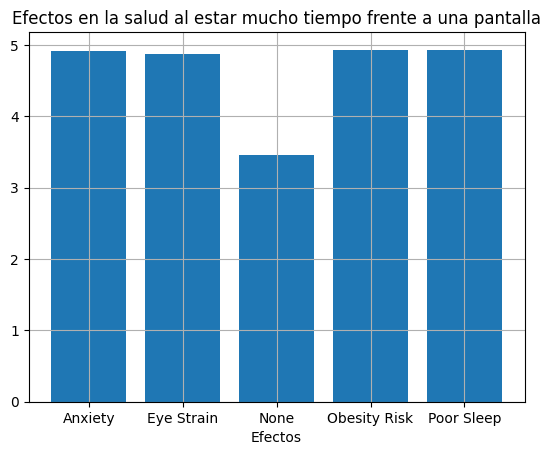

In [145]:
plt.bar(filtered_by_impact.index, filtered_by_impact.values)
plt.title("Efectos en la salud al estar mucho tiempo frente a una pantalla")
plt.xlabel("Efectos")
plt.grid()
plt.show()

**Explicación breve del gráfico**

Hay 4 impactos en la salud de los menores que dedican mucho tiempo a usar dispositivos electrónicos: ansiedad (*anxiety*), fatiga visual (*eye strain*), riesgo de obesidad (*obesity risk*) y pérdida del sueño (*poor sleep*). También tenemos casos en los que no hay (de momento) un impacto negativo en la salud (*None*). Entonces, esto confirma la hipótesis de que el uso prolongado de pantallas puede afectar el sueño y a la vez con altas probabilidades de sufrir otras consecuencias. Sorprendentemente hay algunos casos que no sufren o no han sufrido de momento los impactos mencionados.

# **¿Influye la edad en el tiempo que dedican los menores a usar un dispositivo?**

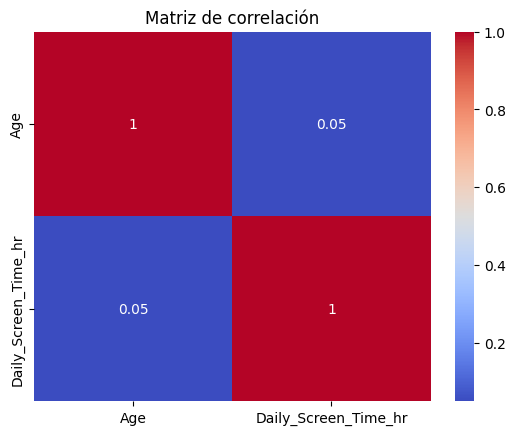

In [205]:
# Seleccionar variables númericas
numeric_variables = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = numeric_variables.corr()

# Visualizar correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

**Interpretación del gráfico**

El gráfico `sns.heatmap()` nos muestra que hay una correlación muy pequeña entre la variable *Daily_Screen_Time_hr* y *Age*. Entonces, ¿influye la edad en el tiempo que dedican los menores a usar un dispositivo? El gráfico muestra que no porque la correlación entre ambas variables es 0.05, es decir, que prácticamente no hay, incluso aunque no sea igual o menor que 0.

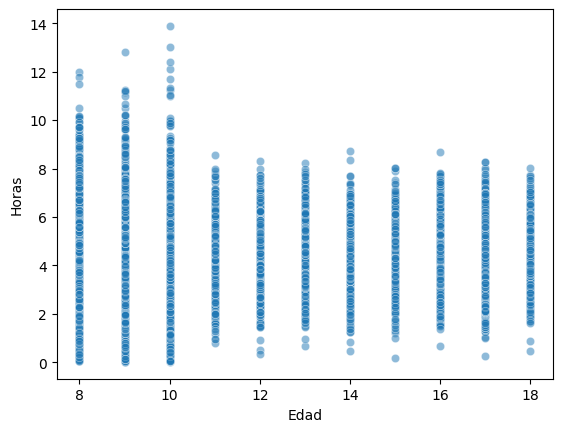

In [206]:
sns.scatterplot(data=df, x='Age', y='Daily_Screen_Time_hr', alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Horas")
plt.show()

# **Conclusión**

El tiempo que un menor de edad dedica a usar un dispositivo electrónico podría afectar su salud física y mental. Por eso, los padres deben estar pendientes de ellos y tomar cartas en el asunto para protegerlos.